In [2]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itables import show
import pprint

import itertools
from multiprocess import Pool
import multiprocess
from multiprocess import Manager
from threading import Thread

import os
import re
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map  # or thread_map
import numpy as np
from scipy.interpolate import interp1d
# from scipy.optimize import UnivariateSpline
from scipy.interpolate import interp1d, UnivariateSpline
import matplotlib.pyplot as plt
from astropy.io import fits
from FitsClass import FITSFile as myfits
from ObservationClass import ObservationManager as obsm
from SimulationClass import Simulations as sc

import specs as specs
from CCF import CCFclass

obs = obsm()

# Plotting spectra

## Plotting X-Shooter full spectra

In [3]:
obs = obsm()
star_name = specs.star_names[0]
print(f'I am working on {star_name}')
star = obs.load_star_instance(star_name)

I am working on Brey  70


Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Data loaded from Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
Data loaded from Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data loaded from Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits


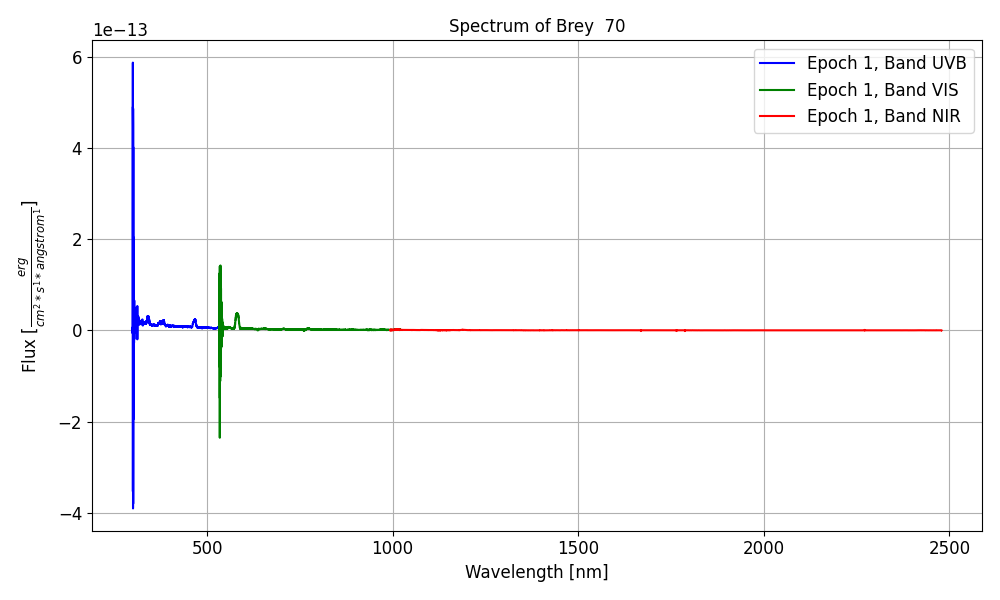

In [7]:
%matplotlib widget
star.plot_spectra([1],['UVB','VIS','NIR'])

## Plotting normalizied spectra

HD 269891
No file or folder named 'cleaned_normalized_flux' found in 'Data/HD 269891/epoch1/COMBINED/output'.


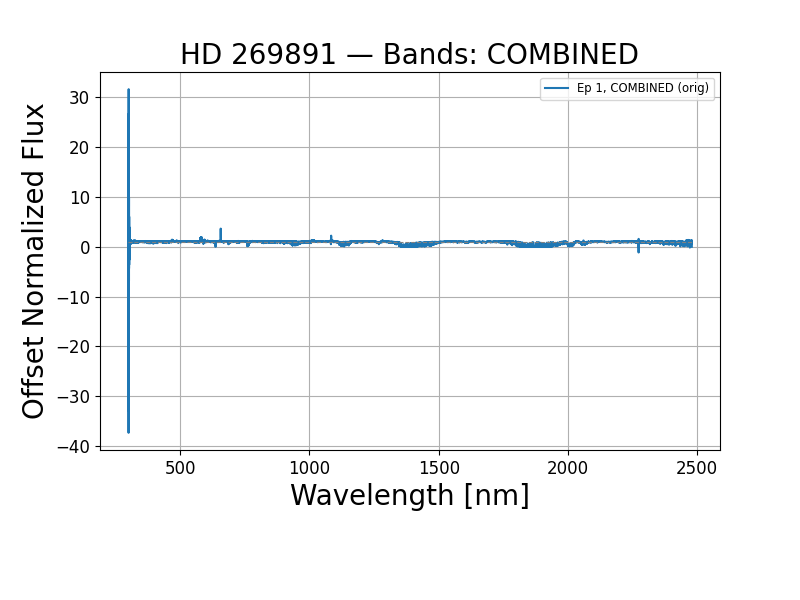

In [2]:
%matplotlib widget
star_name = specs.star_names[24]
print(star_name)
star = obs.load_star_instance(star_name)
star.plot_normalized_spectra(bands = 'COMBINED',compare=False,separation=0,bin_window=0,bary_correction=False,epoch_nums=[1])
# star.plot_normalized_spectrum(3,['UVB','VIS','NIR'])

Brey  95a
No file or folder named 'cleaned_normalized_flux' found in 'Data/Brey  95a/epoch5/COMBINED/output'.
No file or folder named 'cleaned_normalized_flux' found in 'Data/Brey  95a/epoch6/COMBINED/output'.


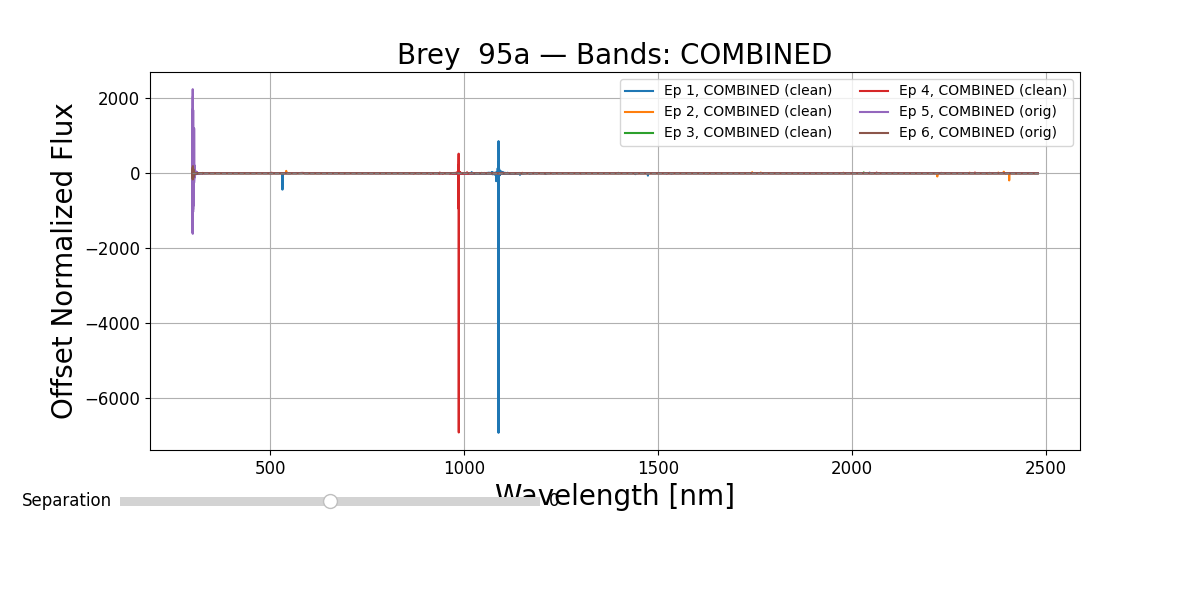

In [17]:
%matplotlib widget
star_name = specs.star_names[4]
print(star_name)
star = obs.load_star_instance(star_name)
star.plot_normalized_spectra(bands = 'COMBINED',compare=False,separation=0,bin_window=0,bary_correction=False,epoch_nums=None)
# star.plot_normalized_spectrum(3,['UVB','VIS','NIR'])

In [8]:
for i, star_name in enumerate(specs.star_names):
    print(f'{i} is {star_name}')

0 is Brey  70
1 is Brey  83
2 is HD  38029
3 is HD  37248
4 is Brey  95a
5 is MNM2014 LMC195-1
6 is HD  32125
7 is HD  37026
8 is HD 269818
9 is HD  38448
10 is HD  38030
11 is HD  37680
12 is Brey  58a
13 is HD  32228
14 is HD  32257
15 is HD 269888
16 is HD  36156
17 is H2013 LMCe  584
18 is RMC 140
19 is HD  32402
20 is Brey  70a
21 is Brey  16a
22 is Brey  93
23 is Brey  90a
24 is HD 269891


### Plot highest and lowest RVs fluxes

Brey  83
No file or folder named 'RVs' found in 'Data/Brey  83/epoch5/COMBINED/output'.
No file or folder named 'RVs' found in 'Data/Brey  83/epoch6/COMBINED/output'.


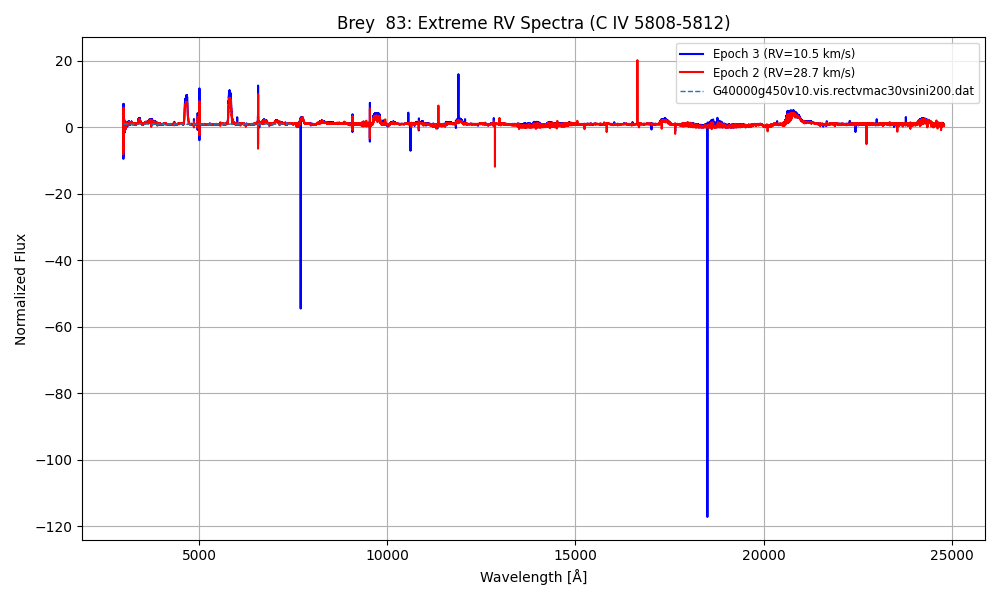

In [4]:
%matplotlib widget
models = [
    'BG20000g300v2.vis.rectvmac30vsini25.dat',
    'G32500g325v10.uv.rectvmac20vsini100.dat',
    'G32500g325v10.vis.rect',
    'G40000g450v10.vis.rectvmac30vsini200.dat']
star_name = specs.star_names[1]
print(star_name)
star = obs.load_star_instance(star_name)
star.plot_extreme_rv_spectra(emission_line = 'C IV 5808-5812',to_plot=True,models = models[3:])

### Preview SNR snitch for cleaned normalized flux

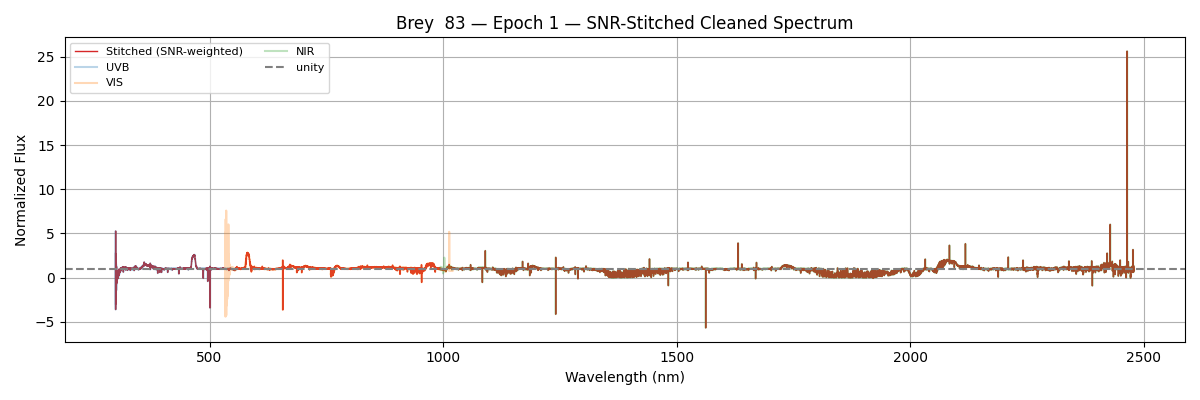

In [8]:
%matplotlib widget
star.preview_snr_stitch_cleaned_normalized(1)
# data = star.load_property('cleaned_normalized_flux',4,'NIR')
# flux = data['normalized_flux']
# wave = data['wavelengths']
# print(len(flux))
# print(len(wave))

## Plotting NRES spectra

### plotting normalized spectra

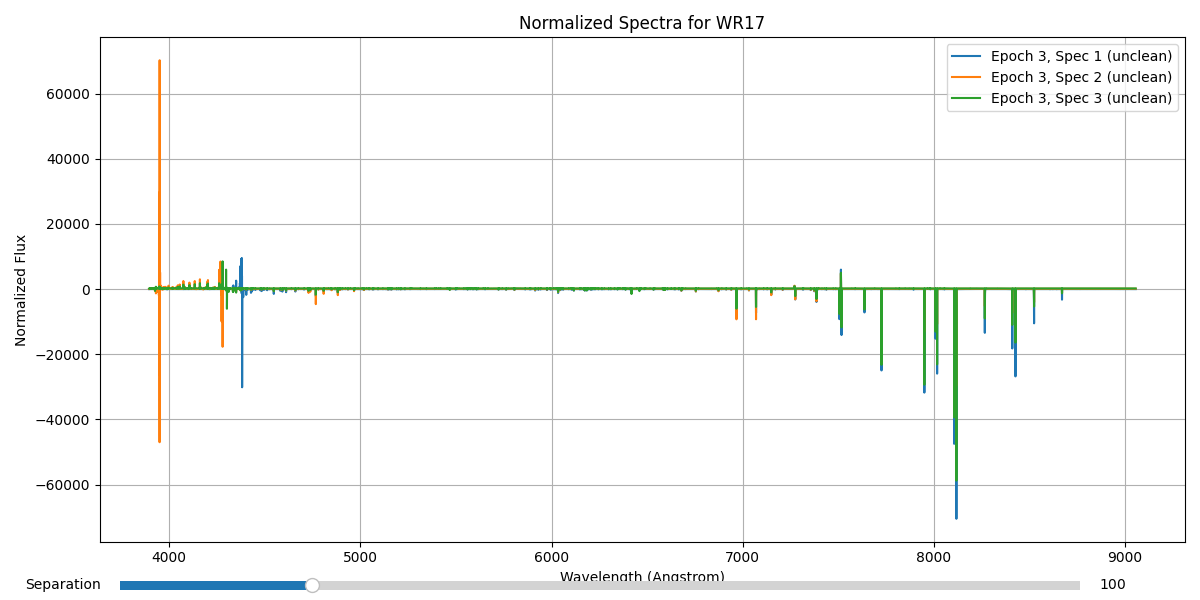

In [22]:
%matplotlib widget
star_names = star_names = ['WR 52','WR17']
star_name = star_names[1]
star = obs.load_star_instance(star_name)
spectra_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
spectra_list = [1,2,3]
star.plot_normalized_spectra(3,spectra_list,bin_window=20,clean=False)
# star_name = star_names[0]
# star = obs.load_star_instance(star_name)
# star.plot_normalized_spectra([1,2,3],[1,3])
# star.plot_normalized_spectra2(1,1)

### Plotting raw spectra

Data loaded from Data/WR 52/epoch1/1/1D/cptnrs03-fa13-20250103-0050-e92-1d.fits.fz


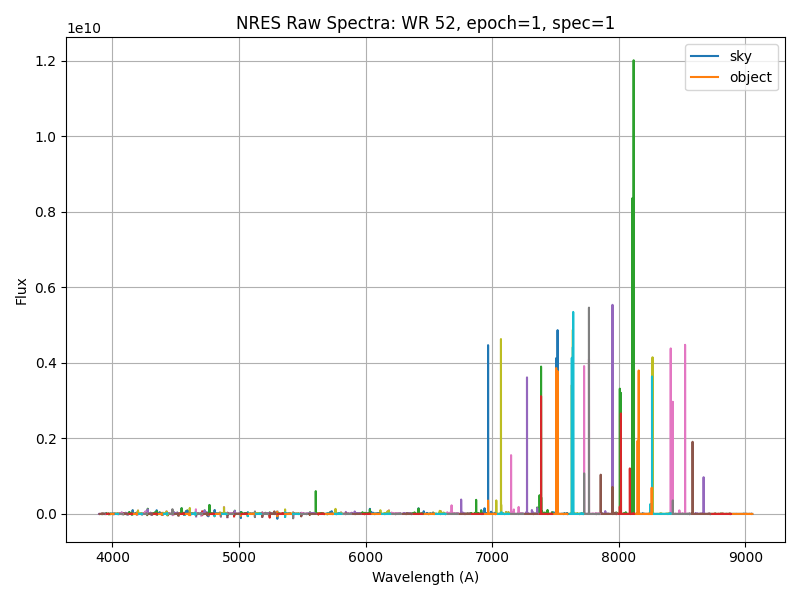

In [4]:
%matplotlib widget
star = obs.load_star_instance('WR17')
plt.clf()
normalized_data = star.load_property('nornormalized_data')
wave = normalized_data

### plotting SNR

{'wavelength': array([3897.88485403, 3897.9067727 , 3897.9286876 , ..., 9054.98743181,
       9055.01691123, 9055.04638386]), 'flux': array([-1.16903305e+05, -6.15583200e+04,  1.22863903e+05, ...,
        3.48336815e+05, -4.04723991e+05, -4.84475906e+01]), 'SNR': array([0.70149219, 0.59653747, 0.53779571, ..., 0.61453935, 0.54707681,
       0.52778694])}


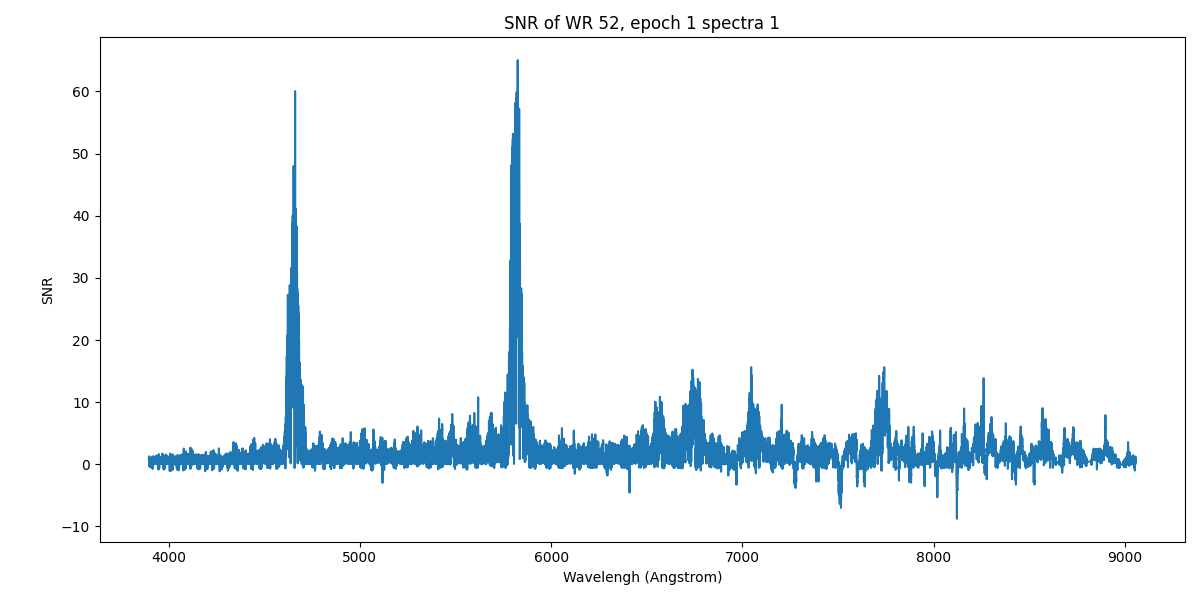

In [17]:
%matplotlib widget

# star.list_available_properties()
star = obs.load_star_instance(star_names[0])
combined_flux = star.load_property('combined_flux',1,1)
wave = combined_flux['wavelength']
flux = combined_flux['flux']
print(combined_flux)
SNR = combined_flux['SNR']
plt.clf()
plt.plot(wave,SNR)
plt.title(f'SNR of {star_names[0]}, epoch 1 spectra 1')
plt.xlabel('Wavelengh (Angstrom)')
plt.ylabel(f'SNR')
plt.show()

Data loaded from Data/WR17/epoch1/12/1D/cptnrs03-fa13-20250103-0044-e92-1d.fits.fz


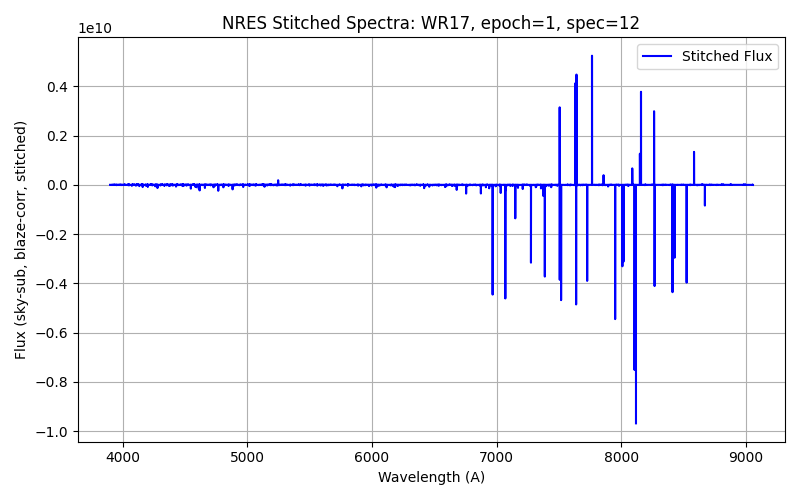

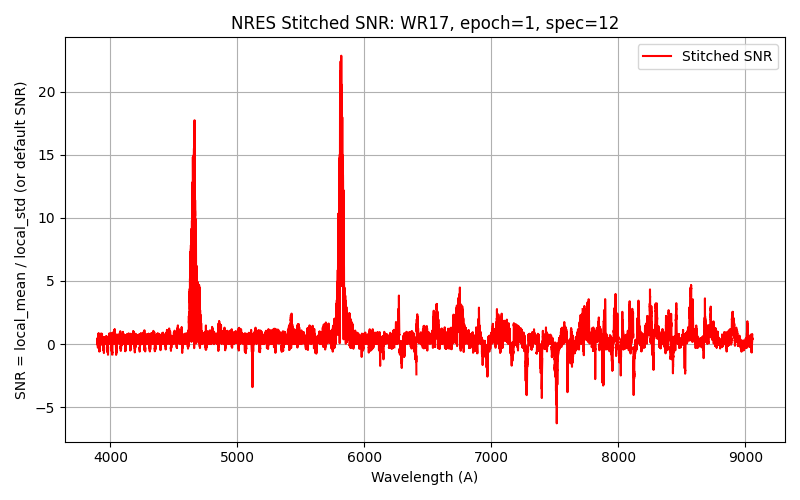

In [14]:
%matplotlib widget
wave,flux,snr = star.plot_stitched_spectra(1,12,my_SNR = True,plot_SNR=True,window_size = 20)

Data loaded from Data/WR17/epoch1/12/1D/cptnrs03-fa13-20250103-0044-e92-1d.fits.fz
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_6267/2644009448.py:9: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[start + 1],flux[start + 1]/blaze[start + 1])
/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_6267/2644009448.py:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[start + 3],flux[start + 3]/blaze[start + 3])
/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_6267/2644009448.py:11: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[start + 5],flux[start + 5]/blaze[start + 5])
/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_6267/2644009448.py:12: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[start + 7],flux[start + 7]/blaze[start + 7])


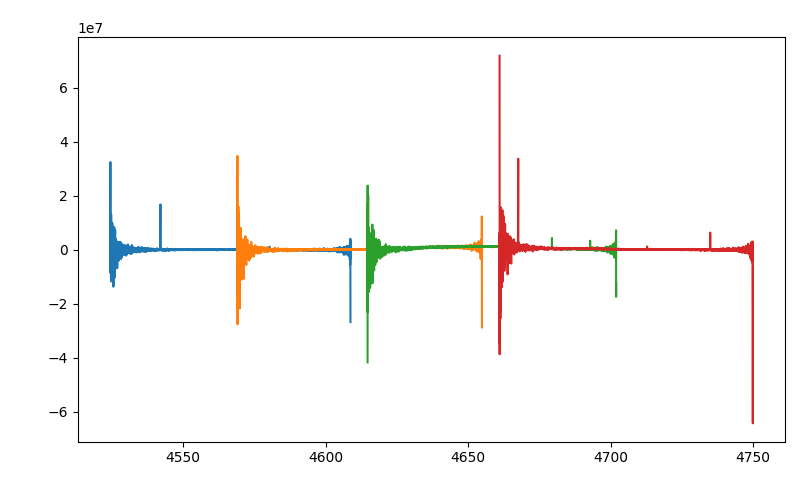

In [5]:
%matplotlib widget
data = star.load_observation(1,12).data
flux = np.flip(data['flux'])
blaze = np.flip(data['blaze'])
wave = np.flip(data['wavelength'])
print(wave[1][10:19])
start = 33
plt.clf()
plt.plot(wave[start + 1],flux[start + 1]/blaze[start + 1])
plt.plot(wave[start + 3],flux[start + 3]/blaze[start + 3])
plt.plot(wave[start + 5],flux[start + 5]/blaze[start + 5])
plt.plot(wave[start + 7],flux[start + 7]/blaze[start + 7])
# plt.plot(wave[1],flux[1])
# plt.plot(wave[3],flux[3])
plt.show()

Data loaded from Data/WR17/epoch1/12/1D/cptnrs03-fa13-20250103-0044-e92-1d.fits.fz


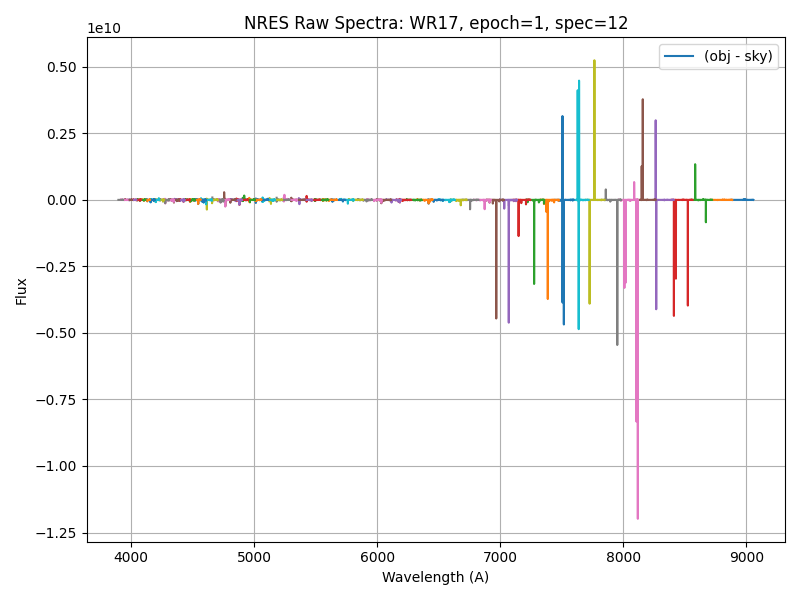

In [17]:
%matplotlib widget
blaze_correction = True
star.plot_raw_spectra(1,12,blaze_correction=blaze_correction,subtract_sky=True,just_sky = False,just_target=True)
emissions = [(4550,4800),(5700,5900)]
plt.xlim(emissions[1])
if blaze_correction:
    plt.ylim((-1e7,0.5e7))
else:
    plt.ylim((-100,1000))

In [4]:
obs = obsm()
star_name = specs.star_names[0]
star = obs.load_star_instance(star_name)
norm = star.load_property('normalized_flux',1,'COMBINED')
print(norm)
points = star.load_property('norm_anchor_wavelengths',1,'COMBINED')
print(points)

{'wavelengths': array([ 298.92,  298.94,  298.96, ..., 2478.84, 2478.9 , 2478.96],
      dtype='>f8'), 'normalized_flux': array([ 0.09609028, -0.05070256,  0.01819126, ...,  0.51625229,
        0.27221397,  0.        ])}
[ 309.52  317.76  332.42  350.58  364.2   387.58  398.84  404.9   412.8
  429.6   475.92  494.38  507.92  520.18  535.68  552.4   568.92  607.92
  631.68  667.96  695.46  714.22  750.68  809.56  849.8   860.22  876.46
  903.5   921.12  992.72 1044.06 1067.82 1103.7  1176.9  1222.8  1331.76
 1521.06 1651.62 1759.2  1985.46 2135.88 2259.66 2396.58 2468.88]


# Plotting the normalized flux when trying to take the 2D image and throw the top and bottom panes, sun along the vertical axis and normalized using what I chose for the 1D flux. And comparing to my normalization

In [2]:
obs = obsm()
star_name = specs.star_names[12]
print(star_name)
star = obs.load_star_instance(star_name)
epoch_num = 4

Brey  58a


In [6]:
data = []
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    data.append([star_name])

df = pd.DataFrame(data, columns=["Star Name"])
print(df)

           Star Name
0           Brey  70
1           Brey  83
2          HD  38029
3          HD  37248
4          Brey  95a
5   MNM2014 LMC195-1
6          HD  32125
7          HD  37026
8          HD 269818
9          HD  38448
10         HD  38030
11         HD  37680
12         Brey  58a
13         HD  32228
14         HD  32257
15         HD 269888
16         HD  36156
17   H2013 LMCe  584
18           RMC 140
19         HD  32402
20         Brey  70a
21         Brey  16a
22          Brey  93
23         Brey  90a
24         HD 269891


In [ ]:
%matplotlib widget
obs = obsm()
star_name = specs.star_names[0]
star = obs.load_star_instance(star_name)
try:
    for epoch_num in range(1,8):
        for band in ['UVB','VIS','NIR']:
            star.clean_flux_and_normalize_interactive(epoch_num,band)

In [19]:
%matplotlib widget
star.clean_flux_and_normalize(epoch_num,'VIS')

Data/Brey  58a/epoch4/VIS/2D image/ADP.2021-09-20T20:03:20.595.fits
Data loaded from Data/Brey  58a/epoch4/VIS/2D image/ADP.2021-09-20T20:03:20.595.fits
Data/Brey  58a/epoch4/VIS/ADP.2021-09-20T20_03_20.594.fits
Data loaded from Data/Brey  58a/epoch4/VIS/ADP.2021-09-20T20_03_20.594.fits
The top lines is: -30, and the bottom line is: -68
 anchor_points_in_range: [538.34 567.54 606.62 650.3  747.8  808.78 872.5  892.58 995.48]
found points from wavelngth_2D: [538.34 567.54 606.62 650.3  747.8  808.78 872.5  892.58 995.48]


ValueError: operands could not be broadcast together with shapes (38,) (24318,) 

Data/Brey  83/epoch2/NIR/2D image/ADP.2020-12-07T08:55:14.104.fits
Data loaded from Data/Brey  83/epoch2/NIR/2D image/ADP.2020-12-07T08:55:14.104.fits
Data/Brey  83/epoch2/NIR/ADP.2020-12-07T08_55_14.103.fits
Data loaded from Data/Brey  83/epoch2/NIR/ADP.2020-12-07T08_55_14.103.fits
The top lines is: -24, and the bottom line is: -52
 anchor_points_in_range: [1032.3  1042.62 1068.66 1224.36 1295.94 1534.5  1562.1  1592.1  1626.18
 1660.68 1715.34 1772.04 1987.62 2037.36 2153.76 2187.12 2208.42 2250.
 2305.86 2395.02 2477.4 ]
found points from wavelngth_2D: [1032.3  1042.62 1068.66 1224.36 1295.94 1534.5  1562.1  1592.1  1626.18
 1660.68 1715.34 1772.04 1987.62 2037.36 2153.76 2187.12 2208.42 2250.
 2305.86 2395.02 2477.4 ]


/Users/guyshtainer/Library/CloudStorage/OneDrive-mail.tau.ac.il/תואר שני!/Thesis/Thesis-codes/StarClass.py:1640: RuntimeWarning: invalid value encountered in divide
  relative_difference = flux_difference / external_normalized_flux_band


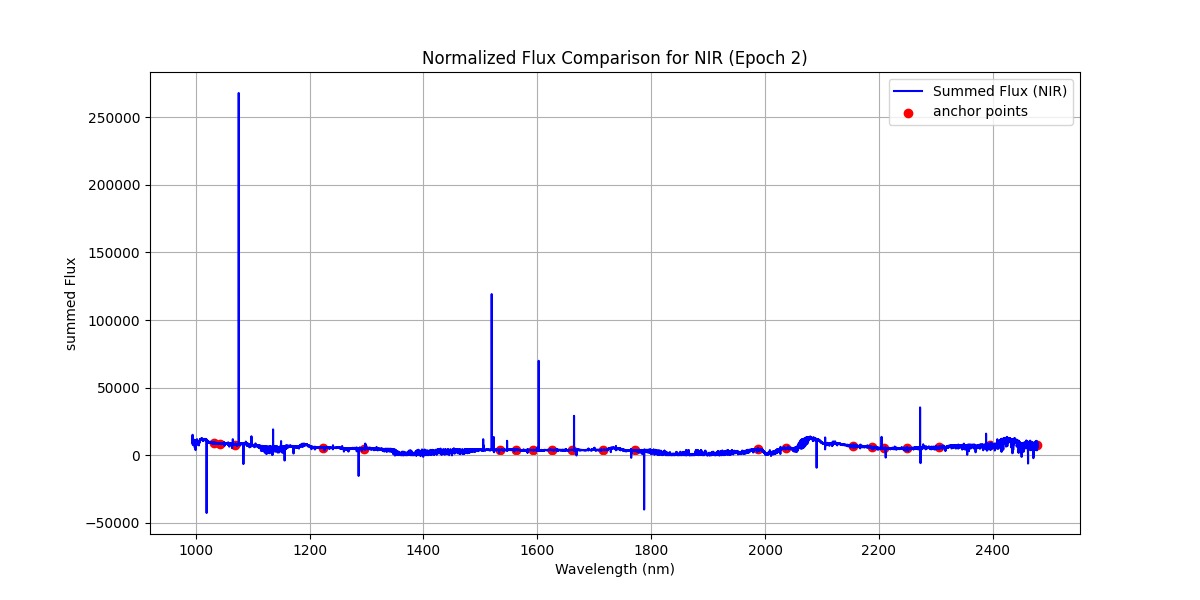

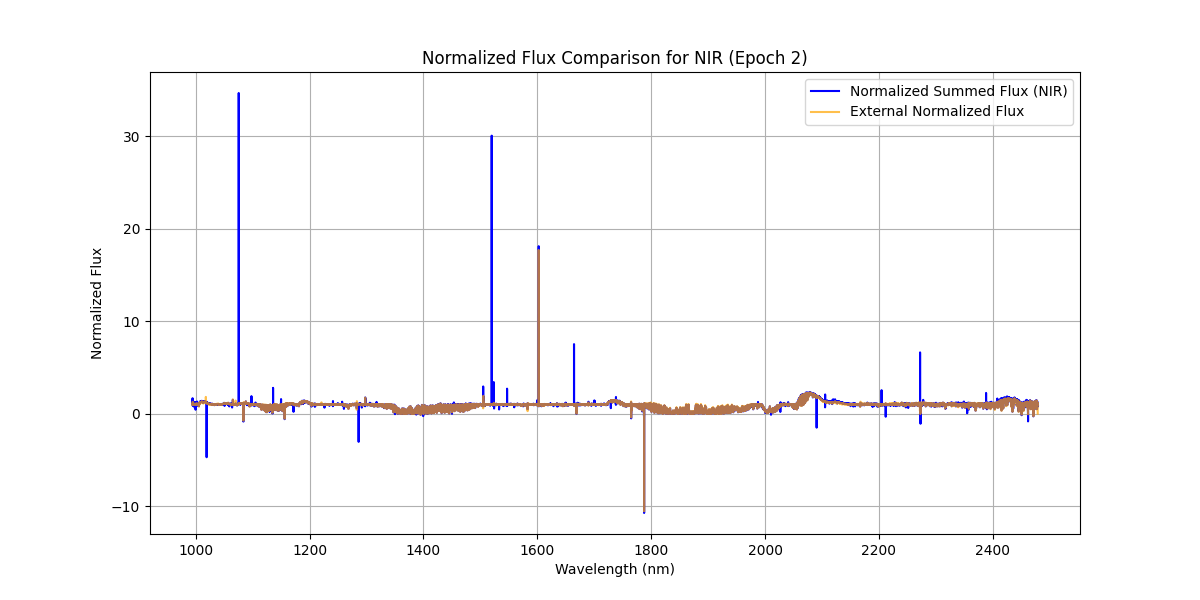

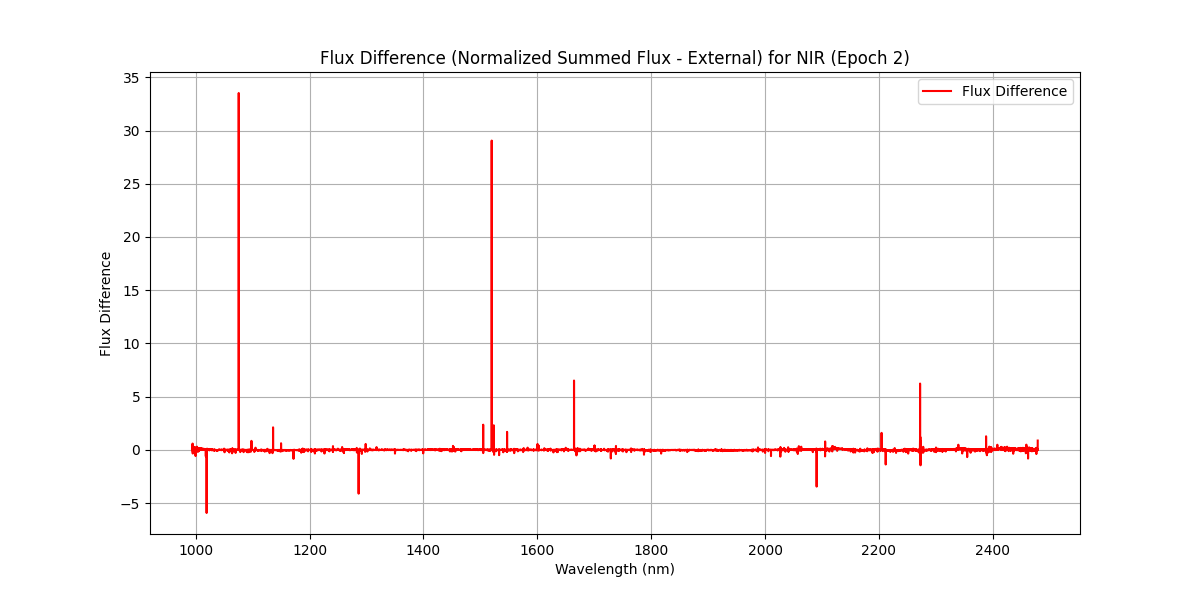

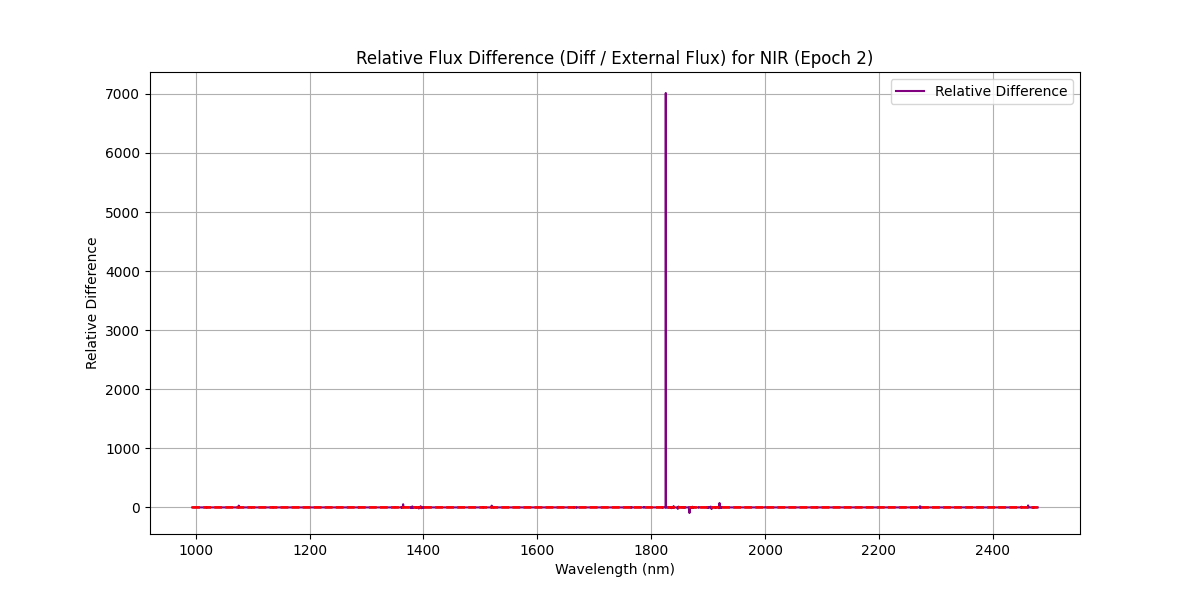

(array([1.16068533, 1.27398004, 1.38727474, ..., 0.91448187, 0.88017143,
        0.87559338]),
 array([ 994.02,  994.04,  994.06, ..., 2478.84, 2478.9 , 2478.96],
       dtype='>f8'),
 (-52, -24))

In [5]:
%matplotlib widget
star.clean_flux_and_normalize(epoch_num,'NIR')